In [3]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
iris = datasets.load_iris()
print(iris.keys())
print(type(iris.data), type(iris.target))
iris.data.shape


dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


(150, 4)

In [2]:
# Data Manipulation with pandas
import os
import pandas as pd

print(os.getcwd())
os.chdir('C:/Users/T0230575/Desktop/Data Management/PyCharmProjets_fm/DataCamp/Data Manipulation with Pandas')
homelessness = pd.read_csv('homelessness.csv')

# Print the head of the homelessness data
print(homelessness.head())

# Print information about homelessness
print(homelessness.info())

# Print the shape of homelessness
print(homelessness.shape)

# Print a description of homelessness
print(homelessness.describe())

# Import pandas using the alias pd
import pandas as pd

# Print the values of homelessness
print(homelessness.values)

# Print the column index of homelessness
print(homelessness.columns)

# Print the row index of homelessness
print(homelessness.index)



# Sort homelessness by individual
homelessness_ind = homelessness.sort_values('individuals').head()

# Print the top few rows
print(homelessness_ind)


# Sort homelessness by descending family members
homelessness_fam = homelessness.sort_values('family_members', ascending=False).head()

# Print the top few rows
print(homelessness_fam)




# Sort homelessness by region, then descending family members
homelessness_reg_fam = homelessness.sort_values(['region','family_members'], ascending=[True,False]).head()

# Print the top few rows
print(homelessness_reg_fam)


C:\Users\T0230575\Desktop\Data Management\PyCharmProjets_fm\DataCamp\Data Manipulation with Pandas
   Unnamed: 0              region       state  individuals  family_members  \
0           0  East South Central     Alabama       2570.0           864.0   
1           1             Pacific      Alaska       1434.0           582.0   
2           2            Mountain     Arizona       7259.0          2606.0   
3           3  West South Central    Arkansas       2280.0           432.0   
4           4             Pacific  California     109008.0         20964.0   

   state_pop  
0    4887681  
1     735139  
2    7158024  
3    3009733  
4   39461588  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 6 columns):
Unnamed: 0        51 non-null int64
region            51 non-null object
state             51 non-null object
individuals       51 non-null float64
family_members    51 non-null float64
state_pop         51 non-null int64
dtypes: float64(2)

In [7]:
# Select the state and family_members columns
state_fam = homelessness[['state','family_members']]

# Print the head of the result
print(state_fam.head())

# Select only the individuals and state columns, in that order
ind_state = homelessness[['individuals','state']]

# Print the head of the result
print(ind_state.head())

# Filter for rows where individuals is greater than 10000
ind_gt_10k = homelessness[homelessness['individuals'] > 10000]

# See the result
print(ind_gt_10k)

# Filter for rows where region is Mountain
mountain_reg = homelessness[homelessness['region'] == 'Mountain']

# See the result
print(mountain_reg)

# Filter for rows where family_members is less than 1000 
# and region is Pacific
fam_lt_1k_pac = homelessness[(homelessness['family_members'] < 1000) & (homelessness['region'] == 'Pacific')]

# See the result
print(fam_lt_1k_pac)



# Subset for rows in South Atlantic or Mid-Atlantic regions
#crit = ['South Atlantic','Mid-Atlantic']
#south_mid_atlantic = homelessness['region'].isin(crit)

south_mid_atlantic = homelessness[(homelessness['region'] == 'South Atlantic') | (homelessness['region'] == 'Mid-Atlantic')]


# See the result
print(south_mid_atlantic)


# The Mojave Desert states
canu = ["California", "Arizona", "Nevada", "Utah"]

# Filter for rows in the Mojave Desert states
mojave_homelessness = homelessness[homelessness["state"].isin(canu)]

# See the result
print(mojave_homelessness)



# Add total col as sum of individuals and family_members
homelessness["total"] = homelessness["individuals"] + homelessness["family_members"]

# Add p_individuals col as proportion of individuals
homelessness["p_individuals"] = homelessness["individuals"] / homelessness["total"]

# See the result
print(homelessness)



# Create indiv_per_10k col as homeless individuals per 10k state pop
homelessness["indiv_per_10k"] = 10000 * homelessness["individuals"] / homelessness["state_pop"] 

# Subset rows for indiv_per_10k greater than 20
high_homelessness = homelessness[homelessness["indiv_per_10k"] > 20]

# Sort high_homelessness by descending indiv_per_10k
high_homelessness_srt = high_homelessness.sort_values("indiv_per_10k", ascending=False)

# From high_homelessness_srt, select the state and indiv_per_10k cols
result = high_homelessness_srt[["state", "indiv_per_10k"]]

# See the result
print(result)

        state  family_members
0     Alabama           864.0
1      Alaska           582.0
2     Arizona          2606.0
3    Arkansas           432.0
4  California         20964.0
   individuals       state
0       2570.0     Alabama
1       1434.0      Alaska
2       7259.0     Arizona
3       2280.0    Arkansas
4     109008.0  California
    Unnamed: 0              region       state  individuals  family_members  \
4            4             Pacific  California     109008.0         20964.0   
9            9      South Atlantic     Florida      21443.0          9587.0   
32          32        Mid-Atlantic    New York      39827.0         52070.0   
37          37             Pacific      Oregon      11139.0          3337.0   
43          43  West South Central       Texas      19199.0          6111.0   
47          47             Pacific  Washington      16424.0          5880.0   

    state_pop     total  p_individuals  indiv_per_10k  
4    39461588  129972.0       0.838704      27.6

In [12]:
sales = pd.read_csv('sales_subset.csv')
sales_1_1 = sales

# Print the head of the sales DataFrame
print(sales.head())

# Print the info about the sales DataFrame
print(sales.info())

# Print the mean of weekly_sales
print(sales.weekly_sales.mean())

# Print the median of weekly_sales
print(sales.weekly_sales.median())

# Print the maximum of the date column
print(sales.date.max())

# Print the minimum of the date column
print(sales.date.min())

# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)
    
# Print IQR of the temperature_c column
print(sales.temperature_c.agg(iqr))



# A custom IQR function
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg(iqr))


# Import NumPy and create custom IQR function
import numpy as np
def iqr(column):
    return column.quantile(0.75) - column.quantile(0.25)

# Update to print IQR and median of temperature_c, fuel_price_usd_per_l, & unemployment
print(sales[["temperature_c", "fuel_price_usd_per_l", "unemployment"]].agg([iqr, np.median]))



# Sort sales_1_1 by date
sales_1_1 = sales_1_1.sort_values('date', ascending=True)

# Get the cumulative sum of weekly_sales, add as cum_weekly_sales col
sales_1_1['cum_weekly_sales'] = sales_1_1['weekly_sales'].cumsum()

# Get the cumulative max of weekly_sales, add as cum_max_sales col
sales_1_1['cum_max_sales'] = sales_1_1['weekly_sales'].cummax()

# See the columns you calculated
print(sales_1_1[["date", "weekly_sales", "cum_weekly_sales", "cum_max_sales"]])




# Drop duplicate store/type combinations
store_types = sales.drop_duplicates(subset=['store','type'])
print(store_types.head())

# Drop duplicate store/department combinations
store_depts = sales.drop_duplicates(subset=["store","department"])
print(store_depts.head())

# Subset the rows where is_holiday is True and drop duplicate dates
holiday_dates = sales[sales['is_holiday']].drop_duplicates(subset="date")

# Print date col of holiday_dates
print(holiday_dates['date'])



# Count the number of stores of each type
store_counts = store_types['type'].value_counts()
print(store_counts)

# Get the proportion of stores of each type
store_props = store_types['type'].value_counts(normalize=True)
print(store_props)

# Count the number of each department number and sort
dept_counts_sorted = store_depts['department'].value_counts(sort=True)
print(dept_counts_sorted)

# Get the proportion of departments of each number and sort
dept_props_sorted = store_depts['department'].value_counts(sort=True, normalize=True)
print(dept_props_sorted)

   Unnamed: 0  store type  department        date  weekly_sales  is_holiday  \
0           0      1    A           1  2010-02-05      24924.50       False   
1           1      1    A           1  2010-03-05      21827.90       False   
2           2      1    A           1  2010-04-02      57258.43       False   
3           3      1    A           1  2010-05-07      17413.94       False   
4           4      1    A           1  2010-06-04      17558.09       False   

   temperature_c  fuel_price_usd_per_l  unemployment  
0       5.727778              0.679451         8.106  
1       8.055556              0.693452         8.106  
2      16.816667              0.718284         7.808  
3      22.527778              0.748928         7.808  
4      27.050000              0.714586         7.808  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10774 entries, 0 to 10773
Data columns (total 10 columns):
Unnamed: 0              10774 non-null int64
store                   10774 non-null in

In [16]:
# Calc total weekly sales
sales_all = sales["weekly_sales"].sum()

# Subset for type A stores, calc total weekly sales
sales_A = sales[sales["type"] == "A"]["weekly_sales"].sum()

# Subset for type B stores, calc total weekly sales
sales_B = sales[sales["type"] == "B"]["weekly_sales"].sum()

# Subset for type C stores, calc total weekly sales
sales_C = sales[sales["type"] == "C"]["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = [sales_A, sales_B, sales_C] / sales_all
print(sales_propn_by_type)


# Group by type; calc total weekly sales
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Get proportion for each type
sales_propn_by_type = sales_by_type / sum(sales_by_type)
print(sales_propn_by_type)


# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales.groupby(['type','is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)



# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales[sales['is_holiday'] == True].groupby(['type','is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)



# From previous step
sales_by_type = sales.groupby("type")["weekly_sales"].sum()

# Group by type and is_holiday; calc total weekly sales
sales_by_type_is_holiday = sales[(sales['is_holiday'] == True) & (sales['type'] == "A")].groupby(['type','is_holiday'])['weekly_sales'].sum()
print(sales_by_type_is_holiday)



# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min, np.max, np.median, np.mean])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby('type')[['unemployment','fuel_price_usd_per_l']].agg([np.min, np.max, np.median, np.mean])

# Print unemp_fuel_stats
print(unemp_fuel_stats)





# Import numpy with the alias np
import numpy as np

# For each store type, aggregate weekly_sales: get min, max, mean, and median
sales_stats = sales.groupby('type')['weekly_sales'].agg([np.min,np.max,np.median, np.mean])

# Print sales_stats
print(sales_stats)

# For each store type, aggregate unemployment and fuel_price_usd_per_l: get min, max, mean, and median
unemp_fuel_stats = sales.groupby(['type','is_holiday'])[['unemployment','fuel_price_usd_per_l']].agg([np.min,np.max,np.median,np.mean])

# Print unemp_fuel_stats
print(unemp_fuel_stats)






# Pivot for mean weekly_sales for each store type
mean_sales_by_type = sales.pivot_table(values="weekly_sales", index="type")

# Print mean_sales_by_type
print(mean_sales_by_type)

# Import NumPy as np
import numpy as np

# Pivot for mean and median weekly_sales for each store type
mean_med_sales_by_type = sales.pivot_table(values="weekly_sales", index='type', aggfunc=[np.mean, np.median])

# Print mean_med_sales_by_type
print(mean_med_sales_by_type)





# Pivot for mean weekly_sales by store type and holiday 
mean_sales_by_type_holiday = sales.pivot_table(values="weekly_sales", columns="is_holiday", index="type")

# Print mean_sales_by_type_holiday
print(mean_sales_by_type_holiday)





# Print mean weekly_sales by department and type; fill missing values with 0
print(sales.pivot_table(values="weekly_sales", index="type", columns="department", fill_value=0))




# Print the mean weekly_sales by department and type; fill missing values with 0s; sum all rows and cols
print(sales.pivot_table(values="weekly_sales", index="department", columns="type", fill_value=0, margins=True))

[0.9097747 0.0902253 0.       ]
type
A    0.909775
B    0.090225
Name: weekly_sales, dtype: float64
type  is_holiday
A     False         2.336927e+08
      True          2.360181e+04
B     False         2.317678e+07
      True          1.621410e+03
Name: weekly_sales, dtype: float64
type  is_holiday
A     True          23601.81
B     True           1621.41
Name: weekly_sales, dtype: float64
type  is_holiday
A     True          23601.81
Name: weekly_sales, dtype: float64
        amin       amax    median          mean
type                                           
A    -1098.0  293966.05  11943.92  23674.667242
B     -798.0  232558.51  13336.08  25696.678370
     unemployment                         fuel_price_usd_per_l            \
             amin   amax median      mean                 amin      amax   
type                                                                       
A           3.879  8.992  8.067  7.972611             0.664129  1.107410   
B           7.170  9.765  9.1

In [26]:
temperatures = pd.read_csv('temperatures.csv')
print(temperatures.info())

# Look at temperatures
print(temperatures)

# Index temperatures by city
temperatures_ind = temperatures.set_index('city')

# Look at temperatures_ind
print(temperatures_ind)

# Reset the index, keeping its contents
print(temperatures_ind.reset_index())

# Reset the index, dropping its contents
print(temperatures_ind.reset_index(drop=True))




# Make a list of cities to subset on
cities = ["Moscow", "Saint Petersburg"]

# Subset temperatures using square brackets
print(temperatures[temperatures["city"].isin(cities)])

# Subset temperatures_ind using .loc[]
print(temperatures_ind.loc[cities])
print(temperatures_ind.loc[['Moscow','Saint Petersburg']])




# Index temperatures by country & city
temperatures_ind = temperatures.set_index(['country','city'])

# List of tuples: Brazil, Rio De Janeiro & Pakistan, Lahore
rows_to_keep = [("Brazil", "Rio De Janeiro"), ('Pakistan','Lahore')]

# Subset for rows to keep
print(temperatures_ind.loc[rows_to_keep])



# Sort temperatures_ind by index values
print(temperatures_ind.sort_index())

# Sort temperatures_ind by index values at the city level
print(temperatures_ind.sort_index(level="city"))

# Sort temperatures_ind by country then descending city
print(temperatures_ind.sort_index(level=["country","city"], ascending=[True,False]))





# Sort the index of temperatures_ind
temperatures_srt = temperatures_ind.sort_index()

# Subset rows from Pakistan to Russia
print(temperatures_srt.loc["Pakistan":"Russia"])

# Try to subset rows from Lahore to Moscow
print(temperatures_srt.loc["Lahore":"Moscow"])

# Subset rows from Pakistan, Lahore to Russia, Moscow
print(temperatures_srt.loc[("Pakistan","Lahore"):("Russia","Moscow")])





# Subset rows from India, Hyderabad to Iraq, Baghdad
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad')])

# Subset columns from date to avg_temp_c
print(temperatures_srt.loc[:, 'date':'avg_temp_c'])

# Subset in both directions at once
print(temperatures_srt.loc[('India','Hyderabad'):('Iraq','Baghdad'), 'date':'avg_temp_c'])







# Use Boolean conditions to subset temperatures for rows in 2010 and 2011
temperatures_bool = temperatures[(temperatures["date"] >= "2010-01-01") & (temperatures["date"] <= "2011-12-31")]
print(temperatures_bool)

# Set date as an index and sort the index
temperatures_ind = temperatures.set_index("date").sort_index()

# Use .loc[] to subset temperatures_ind for rows in 2010 and 2011
print(temperatures_ind.loc["2010":"2011"])

# Use .loc[] to subset temperatures_ind for rows from Aug 2010 to Feb 2011
print(temperatures_ind.loc["2010-08":"2011-02"])




# Get 23rd row, 2nd column (index 22, 1)
print(temperatures.iloc[22, 1])

# Use slicing to get the first 5 rows
print(temperatures.iloc[0:5,])

# Use slicing to get columns 3 to 4
print(temperatures.iloc[:,2:4])

# Use slicing in both directions at once
print(temperatures.iloc[0:5,2:4])





# Add a year column to temperatures
temperatures['year'] = temperatures['date'].dt.year

# Pivot avg_temp_c by country and city vs year
temp_by_country_city_vs_year = temperatures.pivot_table(values="avg_temp_c", columns='year', index=['country','city'])

# See the result
print(temp_by_country_city_vs_year)




# Subset for Egypt to India
temp_by_country_city_vs_year.loc['Egypt':'India']

# Subset for Egypt, Cairo to India, Delhi
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi')]

# Subset in both directions at once
temp_by_country_city_vs_year.loc[('Egypt','Cairo'):('India','Delhi'), '2005':'2010']





# Get the worldwide mean temp by year
mean_temp_by_year = temp_by_country_city_vs_year.mean()

# Filter for the year that had the highest mean temp
print(mean_temp_by_year[mean_temp_by_year == mean_temp_by_year.max()])

# Get the mean temp by city
mean_temp_by_city = temp_by_country_city_vs_year.mean(axis="columns")

# Filter for the city that had the lowest mean temp
print(mean_temp_by_city[mean_temp_by_city == mean_temp_by_city.min()])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16500 entries, 0 to 16499
Data columns (total 5 columns):
Unnamed: 0    16500 non-null int64
date          16500 non-null object
city          16500 non-null object
country       16500 non-null object
avg_temp_c    16407 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 644.6+ KB
None
       Unnamed: 0        date     city        country  avg_temp_c
0               0  2000-01-01  Abidjan  Côte D'Ivoire      27.293
1               1  2000-02-01  Abidjan  Côte D'Ivoire      27.685
2               2  2000-03-01  Abidjan  Côte D'Ivoire      29.061
3               3  2000-04-01  Abidjan  Côte D'Ivoire      28.162
4               4  2000-05-01  Abidjan  Côte D'Ivoire      27.547
5               5  2000-06-01  Abidjan  Côte D'Ivoire      25.812
6               6  2000-07-01  Abidjan  Côte D'Ivoire      24.870
7               7  2000-08-01  Abidjan  Côte D'Ivoire      24.884
8               8  2000-09-01  Abidjan  Côte D'Iv

AttributeError: Can only use .dt accessor with datetimelike values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
Unnamed: 0      18249 non-null int64
Date            18249 non-null object
AveragePrice    18249 non-null float64
Total Volume    18249 non-null float64
4046            18249 non-null float64
4225            18249 non-null float64
4770            18249 non-null float64
Total Bags      18249 non-null float64
Small Bags      18249 non-null float64
Large Bags      18249 non-null float64
XLarge Bags     18249 non-null float64
type            18249 non-null object
year            18249 non-null int64
region          18249 non-null object
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB
None
   Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0           0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1           1  2015-12-20          1.35      54876.98   674.28   44638.81   
2           2  2015-12-13          0.93     118220.22 

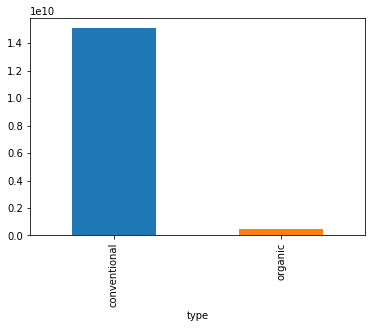

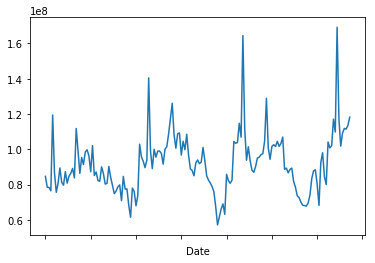

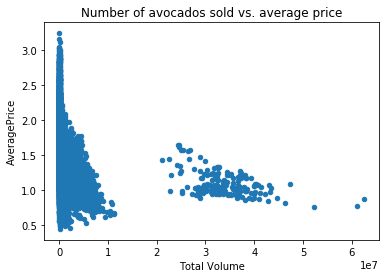

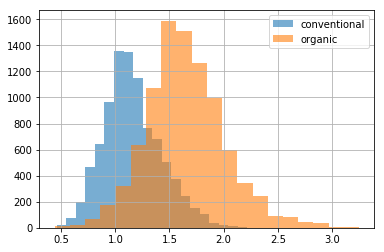

In [34]:
# Import matplotlib.pyplot with alias plt
avocados = pd.read_csv('avocado.csv')
print(avocados.info())

import matplotlib.pyplot as plt

# Look at the first few rows of data
print(avocados.head())

# Get the total number of avocados sold of each size
nb_sold_by_size = avocados.groupby("type")["Total Volume"].sum()

# Create a bar plot of the number of avocados sold by size
nb_sold_by_size.plot(kind="bar")

# Show the plot
plt.show()




# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Get the total number of avocados sold on each date
nb_sold_by_date = avocados.groupby('Date')["Total Volume"].sum()

# Create a line plot of the number of avocados sold by date
nb_sold_by_date.plot(kind="line", x="Date", y="Total Volume")

# Show the plot
plt.show()





# Scatter plot of nb_sold vs avg_price with title
avocados.plot(x="Total Volume", y="AveragePrice", kind="scatter", title="Number of avocados sold vs. average price")

# Show the plot
plt.show()




# Histogram of conventional avg_price 
avocados[avocados['type'] == 'conventional']['AveragePrice'].hist(alpha=.6, bins=20)

# Histogram of organic avg_price
avocados[avocados['type'] == 'organic']['AveragePrice'].hist(alpha=.6, bins=20)

# Add a legend
plt.legend(["conventional","organic"])

# Show the plot
plt.show()


       Unnamed: 0   Date  AveragePrice  Total Volume   4046   4225   4770  \
0           False  False         False         False  False  False  False   
1           False  False         False         False  False  False  False   
2           False  False         False         False  False  False  False   
3           False  False         False         False  False  False  False   
4           False  False         False         False  False  False  False   
5           False  False         False         False  False  False  False   
6           False  False         False         False  False  False  False   
7           False  False         False         False  False  False  False   
8           False  False         False         False  False  False  False   
9           False  False         False         False  False  False  False   
10          False  False         False         False  False  False  False   
11          False  False         False         False  False  False  False   

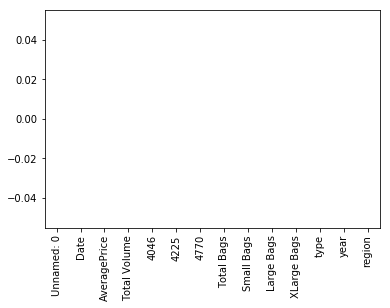

Unnamed: 0      False
Date            False
AveragePrice    False
Total Volume    False
4046            False
4225            False
4770            False
Total Bags      False
Small Bags      False
Large Bags      False
XLarge Bags     False
type            False
year            False
region          False
dtype: bool


In [37]:
# Import matplotlib.pyplot with alias plt
import matplotlib.pyplot as plt

# Check individual values for missing values
print(avocados.isna())

# Check each column for missing values
print(avocados.isna().any())

# Bar plot of missing values by variable
avocados.isna().sum().plot(kind="bar")

# Show plot
plt.show()



# Remove rows with missing values
avocados_complete = avocados.dropna()

# Check if any columns contain missing values
print(avocados_complete.isna().any())



# List the columns with missing values
cols_with_missing = ["small_sold", "large_sold", "xl_sold"]

# Create histograms showing the distributions cols_with_missing
avocados[cols_with_missing].hist()

# Show the plot
plt.show()

In [ ]:
# Create a list of dictionaries with new data
avocados_list = [
    {"date": "2019-11-03", "small_sold": 10376832, "large_sold": 7835071},
    {"date": "2019-11-10", "small_sold": 10717154, "large_sold": 8561348},
]

# Convert list into DataFrame
avocados_2019 = pd.DataFrame(avocados_list)

# Print the new DataFrame
print(avocados_2019)



# Create a dictionary of lists with new data
avocados_dict = {
  "date": ["2019-11-17", "2019-12-01"],
  "small_sold": [10859987, 9291631],
  "large_sold": [7674135, 6238096]
}

# Convert dictionary into DataFrame
avocados_2019 = pd.DataFrame(avocados_dict)

# Print the new DataFrame
print(avocados_2019)





# From previous step
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())

# For each airline, select nb_bumped and total_passengers and sum
airline_totals = airline_bumping.groupby('airline')[['nb_bumped','total_passengers']].sum()





# From previous steps
airline_bumping = pd.read_csv("airline_bumping.csv")
print(airline_bumping.head())
airline_totals = airline_bumping.groupby("airline")[["nb_bumped", "total_passengers"]].sum()

# Create new col, bumps_per_10k: no. of bumps per 10k passengers for each airline
airline_totals["bumps_per_10k"] = airline_totals["nb_bumped"] / airline_totals["total_passengers"] * 10000